# Logistic Regression in TensorFlow

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

In [4]:
# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

In [5]:
# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [6]:
# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

In [7]:
# Minimize error using cross entropy

# Cross entropy
cost = tf.reduce_mean( -tf.reduce_sum(y*tf.log(pred), reduction_indices=1) )

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

In [8]:
# Initializing the variables
init = tf.global_variables_initializer()

In [9]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 1.175765760
Epoch: 0002 cost= 0.662211569
Epoch: 0003 cost= 0.550528342
Epoch: 0004 cost= 0.496682484
Epoch: 0005 cost= 0.463698466
Epoch: 0006 cost= 0.440892180
Epoch: 0007 cost= 0.423977649
Epoch: 0008 cost= 0.410613063
Epoch: 0009 cost= 0.399908744
Epoch: 0010 cost= 0.390926166
Epoch: 0011 cost= 0.383335643
Epoch: 0012 cost= 0.376794658
Epoch: 0013 cost= 0.371020695
Epoch: 0014 cost= 0.365888950
Epoch: 0015 cost= 0.361368662
Epoch: 0016 cost= 0.357248354
Epoch: 0017 cost= 0.353573571
Epoch: 0018 cost= 0.350168565
Epoch: 0019 cost= 0.347024083
Epoch: 0020 cost= 0.344156632
Epoch: 0021 cost= 0.341527212
Epoch: 0022 cost= 0.338988009
Epoch: 0023 cost= 0.336679159
Epoch: 0024 cost= 0.334483589
Epoch: 0025 cost= 0.332441212
Optimization Finished!
Accuracy: 0.9148


## Cross entropy Cost


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [11]:
x = np.linspace(0, 1, 1000) + 1e-10

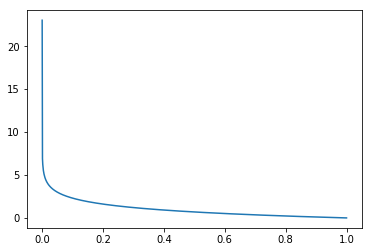

In [12]:
plt.plot(x, -np.log(x));

$$-\sum_i{L_i\log(\hat{y}_i)} => \sum_i{L_i \times -\log(\hat{y}_i)}$$


$L = \begin{bmatrix}  0\\1  \end{bmatrix}$

$\hat{Y} = \begin{bmatrix}  0\\1  \end{bmatrix},\quad \begin{bmatrix}  0\\1  \end{bmatrix} \cdot -\log{\begin{bmatrix}  0\\1  \end{bmatrix}} = \begin{bmatrix}  0\\1  \end{bmatrix} \cdot {\begin{bmatrix}  \infty\\0  \end{bmatrix}} = \begin{bmatrix}  0\\0  \end{bmatrix} = 0,\quad cost=0$

$\hat{Y} = \begin{bmatrix}  1\\0  \end{bmatrix},\quad \begin{bmatrix}  0\\1  \end{bmatrix} \cdot -\log{\begin{bmatrix}  1\\0  \end{bmatrix}} = \begin{bmatrix}  0\\1  \end{bmatrix} \cdot {\begin{bmatrix}  0\\ \infty  \end{bmatrix}} = \begin{bmatrix}  0\\ \infty  \end{bmatrix} = \infty,\quad cost=\infty$